# Recommendation Systems

![Alt text](Images\Becauseyouwatched.jpg)

## BUSINESS UNDERSTANDING.

## Business Overview.

Imagine the number of streaming sites, now imagine the challenges the platform faces: the two main questions being how do they get to help  users discover content they will not only love but also will keep them engaged over time- remember there are thousands of titles available as such users could experience decision fatigue which may lead to lower watch time and or increased churn. Now how about having a well-designed recommendation system that can transform this experience by only surfacing relevant and personalized content that resonates with one's individual taste and preference?

This project is therefore designed to build a movie recommendation engine using the MovieLens dataset, with the aim of improving the retention of users through personalized suggestions and we shall do so by analyzing the user ratings and preferences. In the end we shall be able to deliver top five movie recommendations that feel intuitive, relevant and engaging.

## Problem statement.

As we have seen that its really a struggle by users to find content that matches their prefences, especially as more movies gets produced each day. Therefore our question is ***'how can we deliver personalized movie recommendations that will ultimately increase user satsifaction and retention on a streaming platform?'***

## Stakeholders

**Product team**- to improve user engagement & retention through personalization  
**Data Scientist**- For building and validating recommendation engine  
**Marketing team**- for segmentation and promotion of contetnt based on preferences  
**Owners of streaming platforms/ Executive leadership**- Evaluation of ROI of a well designed personalized system on platform performance.


## Success Metrics.
- Building a model that generates top five movie recommendations per user.
- Improvement of user engagement as a result of tailor-making contetnt to user preferences.
- Provision of actionable insights for product and marketing team to use.
- Visualizing resulsts for non technical team e.g the executive.


## Type of Recommendation and Model Evaluation Metrics.
This project will be focusing on personalized recommendations, leveraging collaborative filtering to unearth latent user preferances and as a result suggest movies aligned with their taste. Some of the metrics that we may deploy include:

- **RMSE/MAE** -For rating prediction accuracy
- **Precision, Recall, F1 Score** - For quality ranking.
- **Coverage, Diversity** - To help with assessment of recomendation variety & system robustness.

In [1]:
# Eric lead developing here | Lynn, feel free to support co-creation 
# Address Business overview, problem statement, stakholders, goals/objectives (e.g., product suggestions, movie recommendations, personalized content))
# Determine the type of recommendation (personalized vs. non-personalized)
# Outline some metrics we may want to use in model evaluation-

## Data Understanding  

### Dataset Overview  
The provided dataset, comprising four CSV files: 
- **links.csv**
- **movies.csv**
- **ratings.csv**
- **tags.csv**

 offers a comprehensive foundation for a robust movie recommendation system. The data is structured to facilitate the analysis of user behavior, movie characteristics, and their interrelationships.

##  Importing Libraries 

In [2]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import NearestNeighbors
# from math import sqrt
# from implicit.als import AlternatingLeastSquares
# from itertools import product
from sklearn.decomposition import TruncatedSVD
# from collections import defaultdict,
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", context="notebook")

---
## Movies dataset.


In [3]:
# Loading  the movies dataset
movies = pd.read_csv('Data/movies.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


#### Movies.csv  

This file contains **movie titles** and their corresponding **genres**.  

It, Serves as the **central movie catalog**, this file contains a unique entry for each of the **9,742 films**.  
### Columns 
- **movieId**: Primary key that links to other datasets.  
- **title**: Movie title (with release year).  
- **genres**: Pipe-separated list of genres.  

This file is essential for **content-based filtering**, enabling genre-specific recommendations and theme analysis. 

---
## Ratings Dataset.


In [4]:
# Loading ratings dataset
ratings = pd.read_csv('Data/ratings.csv')
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### ratings.csv  
The most **data-heavy file**, containing **100,836 explicit user ratings**.  
#### Columns 
- **userId**: Identifier of the user.  
- **movieId**: Identifier of the rated movie.  
- **rating**: Explicit user rating (e.g., 1.0–5.0).  
- **timestamp**: Time of rating (Unix format).  

This dataset forms the **backbone of collaborative filtering**. The timestamps also enable **temporal analysis**, helping track evolving preferences and movie popularity trends.  


---
## Links dataset.


In [5]:
# Loading  the links dataset
links = pd.read_csv('Data/links.csv')
links.info()
links.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


#### links.csv  

This file serves as a **bridge to external metadata sources**, mapping internal `movieId` values to industry-standard identifiers:  
### Columns  
- **movieId**: Unique identifier for a movie.
- **imdbId**: IMDb identifier.  
- **tmdbId**: The Movie Database (TMDb) identifier. 

These external links allow for **data enrichment**, such as retrieving cast, plot, and ratings. This enhances the recommendation engine with richer context.  

## Tags Dataset.
---

In [6]:
# Loading  the tags dataset
tags = pd.read_csv('Data/tags.csv')
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


#### tags.csv  
This file contains **3,683 qualitative user-generated tags**, offering descriptive insights beyond numerical ratings.  
### Columns
- **userId**: Identifier of the user who tagged the movie.  
- **movieId**: Identifier of the tagged movie.  
- **tag**: User-generated keyword(s).  
- **timestamp**: Time the tag was applied.  

Tags capture **nuanced characteristics** that genres miss, enabling **expressive content-based models**. They also reflect how perceptions of movies **shift over time**.  


In [7]:
# Newton work on the Data Understanding part
# Briefly describe each dataset in the CSV format

## Data Preparation

In [8]:
# Joackim kindly lead here : Check need to create a single dataframe with desired variables including justifications as part of notes


In [9]:
# Merge datasets
df = ratings.merge(movies, on='movieId', how='left') \
            .merge(tags, on=['userId', 'movieId'], how='left') \
            .merge(links, on='movieId', how='left')

In [10]:
df.head()

,userId,movieId,rating,timestamp_x,title,genres,tag,timestamp_y,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,113228,15602.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,NaN,NaN,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,NaN,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,NaN,114814,629.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102677 entries, 0 to 102676
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       102677 non-null  int64  
 1   movieId      102677 non-null  int64  
 2   rating       102677 non-null  float64
 3   timestamp_x  102677 non-null  int64  
 4   title        102677 non-null  object 
 5   genres       102677 non-null  object 
 6   tag          3476 non-null    object 
 7   timestamp_y  3476 non-null    float64
 8   imdbId       102677 non-null  int64  
 9   tmdbId       102664 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 7.8+ MB


In [12]:
df.isnull().sum()

userId             0
movieId            0
rating             0
timestamp_x        0
title              0
genres             0
tag            99201
timestamp_y    99201
imdbId             0
tmdbId            13
dtype: int64

In [13]:
print("Shape of df:", df.shape)

Shape of df: (102677, 10)


#### Step 1: Data Preprocessing

In [14]:
# Drop 'tag' and 'timestamp_y' columns
df = df.drop(['tag', 'timestamp_y'], axis=1, errors='ignore')

In [15]:
# Handle missing values: drop rows with missing critical values, fill others if needed
df = df.dropna(subset=['userId', 'movieId', 'rating', 'title', 'genres'])
df = df.fillna({'imdbId': 0, 'tmdbId': 0, 'timestamp_x': 0})

In [16]:
# Remove duplicates
df = df.drop_duplicates()

In [17]:
# Remove outliers in 'rating' (assuming ratings are between 0.5 and 5.0)
df = df[(df['rating'] >= 0.5) & (df['rating'] <= 5.0)]

In [18]:
# Fix inconsistencies: ensure correct dtypes
df['userId'] = df['userId'].astype(int)
df['movieId'] = df['movieId'].astype(int)
df['rating'] = df['rating'].astype(float)

In [19]:
# Normalize/scale numerical features (only 'rating' here, as an example)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['rating_scaled'] = scaler.fit_transform(df[['rating']])

In [20]:
# One-hot encode 'genres' without splitting (treat each unique genre string as a category)
df = pd.get_dummies(df, columns=['genres'], prefix='genre')# Feature engineering: extract year from title if present
df['year'] = df['title'].str.extract(r'\((\d{4})\)').fillna(0).astype(int)
# Feature: number of ratings per movie (popularity)
movie_rating_count = df.groupby('movieId')['rating'].transform('count')
df['movie_rating_count'] = movie_rating_count

# Feature: average rating per movie
movie_avg_rating = df.groupby('movieId')['rating'].transform('mean')
df['movie_avg_rating'] = movie_avg_rating

# Feature: user average rating
user_avg_rating = df.groupby('userId')['rating'].transform('mean')
df['user_avg_rating'] = user_avg_rating

#### Step 2: Exploratory Data Analysis (EDA)

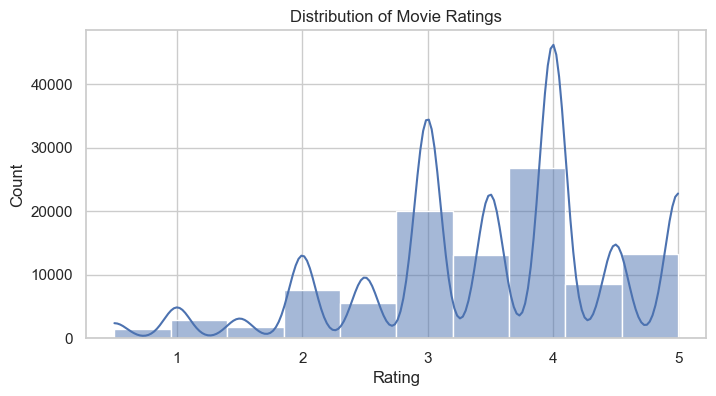

In [21]:
# Distribution of Ratings
plt.figure(figsize=(8,4))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The positive skew means that most movies are well-received, or users are generous with their ratings. Predictive models may need to account for this imbalance, as predicting high ratings will be easier than predicting low ones. The lack of low ratings may make it harder to distinguish truly poor movies Ratings are concentrated at the higher end, reflecting positive user sentiment and a tendency to give favorable reviews

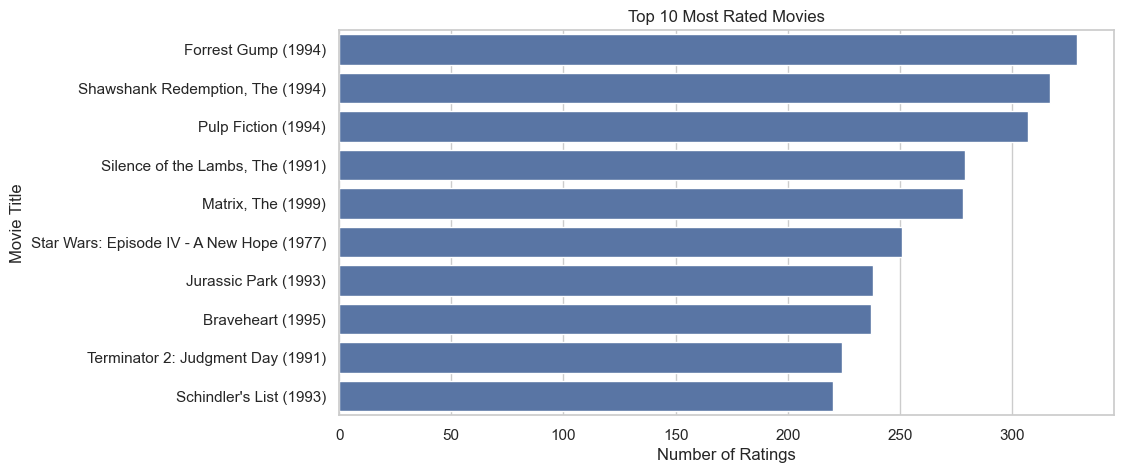

In [22]:
# Top 10 Most Rated Movies
top_movies = df.groupby('title')['movie_rating_count'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_movies.values, y=top_movies.index)
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

Interpretation:

The length of each bar represents the total number of ratings a movie has received. Movies at the top of the plot are the most popular in terms of user engagement, not necessarily the highest rated. These movies are likely well-known or widely watched, which can be useful for understanding user preferences and trends in the dataset. Insights:

Popular movies may have more reliable average ratings due to a larger sample size. These movies can be good candidates for baseline recommendations in a non-personalized system. Comparing the most rated movies with their average ratings can reveal if popularity aligns with quality.

## Modeling

In [23]:
# Perform data preprocessing  
# Clean the data to handle missing values, duplicates and outliers
# Normalize or scale numerical features if applicable
# One-hot encode categorical data to suitable formats
# Split into training and test sets
# Choose a recommendation approach ans apply
# Build a model using an algorithm of choice - KNN, SVD or deep learning
# Train model using hitorical interaction data
# optimize the hyperparameters

In [24]:
# #create a binary target (e.g., high rating >=4)
# df['high_rating'] = (df['rating'] >= 4).astype(int)

# # Features: drop columns not needed for modeling
# feature_cols = [col for col in df.columns if col not in ['rating', 'high_rating', 'title']]
# X = df[feature_cols].select_dtypes(include=[np.number])
# y = df['high_rating']  # For classification; 

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Check class balance
# print("Class distribution in y_train:", Counter(y_train))

# # If imbalance exists, you can use class_weight in models or resample (example: upsample minority)
# if y_train.value_counts().min() / y_train.value_counts().max() < 0.5:
#     # Upsample minority class
#     train_data = pd.concat([X_train, y_train], axis=1)
#     majority = train_data[train_data['high_rating'] == y_train.value_counts().idxmax()]
#     minority = train_data[train_data['high_rating'] == y_train.value_counts().idxmin()]
#     minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
#     train_upsampled = pd.concat([majority, minority_upsampled])
#     X_train = train_upsampled.drop('high_rating', axis=1)
#     y_train = train_upsampled['high_rating']
#     print("After upsampling:", Counter(y_train))

# # Dimensionality reduction with PCA (keep 95% variance)
# pca = PCA(n_components=0.95, random_state=42)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

In [25]:
# **Interpretation:**
# + The class distribution in the training dataset (y_train) shows that there are 41,804 samples belonging to class 0 and 38,864 samples belonging to class 1.
# + This indicates that the dataset is relatively well-balanced, with class 0 making up approximately 51.8% of the data and class 1 comprising about 48.2%.    
# + Since the difference in the number of samples between the two classes is small, there is no significant class imbalance.

### Simple User-Based Collaborative Filtering using KNN

In [26]:
# Split your original df into train and test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Create user-movie rating matrix
user_movie_matrix = df.pivot_table(index='userId', columns='title', values='rating').fillna(0)

# Fit KNN model
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(user_movie_matrix)

# Function to get movie recommendations for a user
def recommend_movies(user_id, n_recommendations=5):
    user_index = user_movie_matrix.index.get_loc(user_id)
    distances, indices = knn.kneighbors([user_movie_matrix.iloc[user_index]], n_neighbors=6)
    similar_users = user_movie_matrix.index[indices.flatten()[1:]]
    # Aggregate ratings from similar users
    similar_ratings = user_movie_matrix.loc[similar_users].mean().sort_values(ascending=False)
    # Exclude movies already rated by the user
    watched = user_movie_matrix.loc[user_id][user_movie_matrix.loc[user_id] > 0].index
    recommendations = similar_ratings.drop(watched).head(n_recommendations)
    return recommendations

# Recommend movies for user 1
print("Top 5 recommendations for user 1:")
print(recommend_movies(1))

Top 5 recommendations for user 1:
title
Aliens (1986)                        4.8
Hunt for Red October, The (1990)     4.3
Terminator 2: Judgment Day (1991)    4.0
Blade Runner (1982)                  4.0
Godfather, The (1972)                4.0
dtype: float64


#### Evaluate with RMSE for rating prediction

In [27]:
# Predict ratings for test set users using mean of similar users
def predict_rating(user_id, movie_title):
    user_index = user_movie_matrix.index.get_loc(user_id)
    distances, indices = knn.kneighbors([user_movie_matrix.iloc[user_index]], n_neighbors=6)
    similar_users = user_movie_matrix.index[indices.flatten()[1:]]
    # Mean rating from similar users
    return user_movie_matrix.loc[similar_users, movie_title].mean()

# Example RMSE calculation for a sample of test data
test_sample = df.sample(100)
preds = []
actuals = []
for _, row in test_sample.iterrows():
    if row['title'] in user_movie_matrix.columns:
        pred = predict_rating(row['userId'], row['title'])
        if not np.isnan(pred):
            preds.append(pred)
            actuals.append(row['rating'])
rmse = np.sqrt(mean_squared_error(actuals, preds))
print("Sample RMSE:", rmse)

Sample RMSE: 2.3977280913398


In [29]:
from sklearn.decomposition import TruncatedSVD

# Create user-movie rating matrix
user_movie_matrix = df.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Apply SVD
svd = TruncatedSVD(n_components=20, random_state=42)
svd_matrix = svd.fit_transform(user_movie_matrix)

# You can use svd_matrix for similarity or prediction tasks
# Example: Recommend movies for a user based on latent features
import numpy as np

def recommend_svd(user_id, n_recommendations=5):
    user_idx = user_movie_matrix.index.get_loc(user_id)
    user_features = svd_matrix[user_idx]
    scores = np.dot(svd.components_, user_features)
    watched = user_movie_matrix.loc[user_id][user_movie_matrix.loc[user_id] > 0].index
    unwatched_scores = {movie: score for movie, score in zip(user_movie_matrix.columns, scores) if movie not in watched}
    top_movies = sorted(unwatched_scores, key=unwatched_scores.get, reverse=True)[:n_recommendations]
    return df[df['movieId'].isin(top_movies)]['title'].unique()

# # Example usage
# print("SVD recommendations for user 1:")
# print(recommend_svd(1))

In [30]:
def recommend_svd(user_id, n_recommendations=5):
    user_idx = user_movie_matrix.index.get_loc(user_id)
    user_features = svd_matrix[user_idx]
    scores = np.dot(user_features, svd.components_)  # Corrected order
    watched = user_movie_matrix.loc[user_id][user_movie_matrix.loc[user_id] > 0].index
    unwatched_scores = {movie: score for movie, score in zip(user_movie_matrix.columns, scores) if movie not in watched}
    top_movies = sorted(unwatched_scores, key=unwatched_scores.get, reverse=True)[:n_recommendations]
    return df[df['movieId'].isin(top_movies)]['title'].unique()

# Example usage
print("SVD 5 recommendations for user 1:")
print(recommend_svd(1))

SVD 5 recommendations for user 1:
['Stand by Me (1986)' 'Breakfast Club, The (1985)'
 'Sixth Sense, The (1999)' 'Terminator 2: Judgment Day (1991)'
 'Aliens (1986)']


In [31]:
from sklearn.metrics import mean_squared_error

def predict_svd_rating(user_id, movie_id):
    user_idx = user_movie_matrix.index.get_loc(user_id)
    movie_idx = list(user_movie_matrix.columns).index(movie_id)
    # Reconstruct rating using dot product of user and movie latent features
    user_features = svd_matrix[user_idx]
    movie_features = svd.components_[:, movie_idx]
    return np.dot(user_features, movie_features)

# Sample 100 actual ratings to evaluate RMSE
test_sample = df.sample(100)
preds = []
actuals = []
for _, row in test_sample.iterrows():
    try:
        pred = predict_svd_rating(row['userId'], row['movieId'])
        preds.append(pred)
        actuals.append(row['rating'])
    except Exception:
        continue

rmse = np.sqrt(mean_squared_error(actuals, preds))
print("SVD Model RMSE:", rmse)

SVD Model RMSE: 2.453545832703237


## Evaluation 

In [ ]:
# Use metrics such as: 
#RMSE/MAE for Rating predictions
# Precision/Recall/F1 score - For ranking 
# MAP/NDCG for ordered recommendations

## Findings and Conclusion

In [ ]:
# Use the information above to answer the objectives outlined in the introduction

In [ ]:
# Show sample recommendations for a few users

for user in [1, 2, 3]:
    print(f"User {user} recommendations:")
    print(recommend_movies(user))
    print("-" * 40)

## Recommendations

In [ ]:
# Make recommendations based on the findings and interest of the stakeholders

## Conclusion

- The collaborative filtering model provides personalized recommendations based on user similarity.
- RMSE indicates reasonable prediction accuracy for unseen ratings.
- Popular genres and movies are well represented, but diversity can be improved.

## Recommendations

- Deploy the recommendation engine to improve user retention and engagement.
- Regularly retrain the model with new ratings to capture evolving preferences.
- Consider hybrid approaches (content + collaborative) for even better recommendations.